Фаррахов Фанур 05-204 Вариант 16.

In [106]:
import numpy as np
import sympy as sp
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [107]:
def f(x, y):
    return 1 - np.sin(2 * x + y) + 0.3 * y / (x + 2)

a = 0
b = 1
h = 0.1
x = np.arange(a, b + h, h)
N = len(x)

**Метод Эйлера**

$y_{n+1} = y_n + h f(x_n, y_n)$, $n = \overline{0, N-1}$

In [108]:
y_exp = np.zeros(N)
y_exp[0] = 0

for n in range(N - 1):
    y_exp[n+1] = y_exp[n] + h * f(x[n], y_exp[n])

print(y_exp)

[0.         0.1        0.17187655 0.22009923 0.24984873 0.26623705
 0.27403397 0.27766368 0.28131932 0.28911607 0.30524164]


**Неявный метод Эйлера**

$y_{n+1}$ определяется как решение уравнения

$y_{n+1} = y_n + h f(x_{n+1}, y_{n+1})$

Для решения этого уравнения будет применять метод простой итерации

$y^{(k+1)}_{n+1} = y_n + h f(x_{n+1}, y^{(k)}_{n+1})$,  $\qquad y^{(0)}_{n+1} = y_n$

Останавливаем итерации при 

$| y^{(k+1)}_{n+1} - y^{(k)}_{n+1} | < h$

In [109]:
y_imp = np.zeros(N)
y_imp[0] = 0

for n in range(N - 1):
    y_next = y_imp[n]
    while True:
        y_prev = y_next
        y_next = y_imp[n] + h * f(x[n+1], y_prev)
        if np.abs(y_next - y_prev) < h:
            break
        
    y_imp[n+1] = y_next

print(y_imp)

[0.         0.08013307 0.13503607 0.16973602 0.18938407 0.1988427
 0.2026118  0.20491365 0.2098372  0.22149195 0.24414061]


**Метод Рунге-Кутта 2-го порядка**

In [110]:
y_rk2 = np.zeros(N)
y_rk2[0] = 0

# Коэффициенты метода
A0 = 1/19
A1 = 1 - A0
alpha = 1/2 * 1/A1
beta  = 1/2 * 1/A1 

# Реализация RK2
for n in range(N - 1):
    phi_0 = f(x[n], y_rk2[n])
    phi_1 = f(x[n] + alpha*h, y_rk2[n] + beta*h*phi_0)

    y_rk2[n+1] = y_rk2[n] + h * (A0 * phi_0 + A1 * phi_1)

print(y_rk2)

[0.         0.08579331 0.14653163 0.1866246  0.21075285 0.22347491
 0.22912184 0.23184445 0.23573333 0.24496735 0.26396063]


In [111]:
# -------------------------------------------------------
#  Таблица результатов
# -------------------------------------------------------
df = pd.DataFrame({
    "x": x,
    "Explicit_Euler": y_exp,
    "Implicit_Euler": y_imp,
    "RK2": y_rk2
})

df

,x,Explicit_Euler,Implicit_Euler,RK2
0,0.0,0.000000,0.000000,0.000000
1,0.1,0.100000,0.080133,0.085793
2,0.2,0.171877,0.135036,0.146532
3,0.3,0.220099,0.169736,0.186625
4,0.4,0.249849,0.189384,0.210753
5,0.5,0.266237,0.198843,0.223475
6,0.6,0.274034,0.202612,0.229122
7,0.7,0.277664,0.204914,0.231844
8,0.8,0.281319,0.209837,0.235733
9,0.9,0.289116,0.221492,0.244967


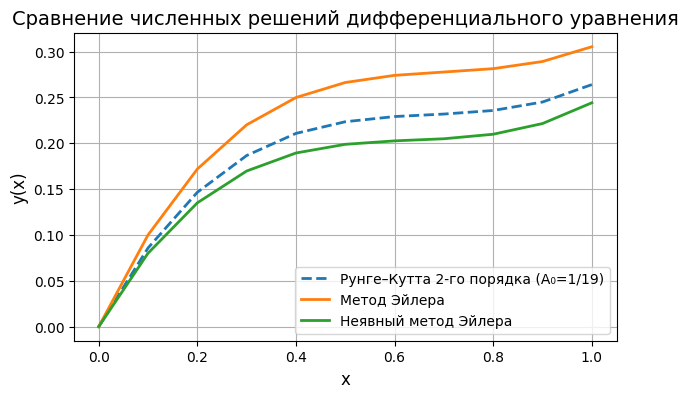

In [112]:
# --- Визуализация ---
plt.figure(figsize=(7, 4))
plt.plot(x, y_rk2, '--', label="Рунге–Кутта 2-го порядка (A₀=1/19)", linewidth=2)
plt.plot(x, y_exp, label="Метод Эйлера", linewidth=2)
plt.plot(x, y_imp, label="Неявный метод Эйлера", linewidth=2)
plt.xlabel("x", fontsize=12)
plt.ylabel("y(x)", fontsize=12)
plt.title("Сравнение численных решений дифференциального уравнения", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

**Метод Адамса**

$y_n$ и $y_{n-1}$ были найдены с помощью

$\phi_{n} = f(x_n, y_n), \quad \phi_{n-1} = f(x_{n-1}, y_{n-1})$

$\phi(x) \approx \phi_n + \frac{\phi_n - \phi_{n-1}}{h}(x - x_n)$ - интерполяционный полином Лагранжа в форме Ньютона по точкам $x_n, x_{n-1}$

Подставляем в формулу интеграла:  
$y_{n+1} = y_n + \int_{x_n}^{x_{n+1}} \phi(x) , dx$

Получаем:  
$y_{n+1} = y_n + \int_{x_n}^{x_{n+1}} \left[\phi_n + \frac{\phi_n - \phi_{n-1}}{h}(x - x_n)\right]dx$,$\quad$где $\phi_n = \phi(x_n) = f(x_n, y_n)$

Сделаем замену $x = x_n + \alpha h$, $\quad 0 \le \alpha \le 1$

$y_{n+1} = y_n + h \int_{0}^{1} \left[\phi_n + \frac{\phi_n - \phi_{n-1}}{h}(\alpha h)\right]d\alpha = y_n + h \int_{0}^{1} \left[\phi_n + (\phi_n - \phi_{n-1}) \alpha\right]d\alpha$

Проинтегрировав получим **экстраполяционную формулу метода Адамса**

$y_{n+1} = y_n + h \left[ \phi_n + \frac{1}{2}(\phi_n - \phi_{n-1}) \right] = y_n + \frac{h}{2} \left[(3 \phi_n - \phi_{n-1}) \right]$

Построим полином по точкам $x_{n+1}, x_n$

$\phi(x) \approx \phi_{n+1} + \frac{\phi_{n+1} - \phi_n}{h}(x - x_{n+1})$  

Подставив в инеграл и проинтегрировав получим **интерполяционную формулу метода Адамса**

$y_{n+1} = y_n + \frac{h}{2}(\phi_{n+1} + \phi_n)$

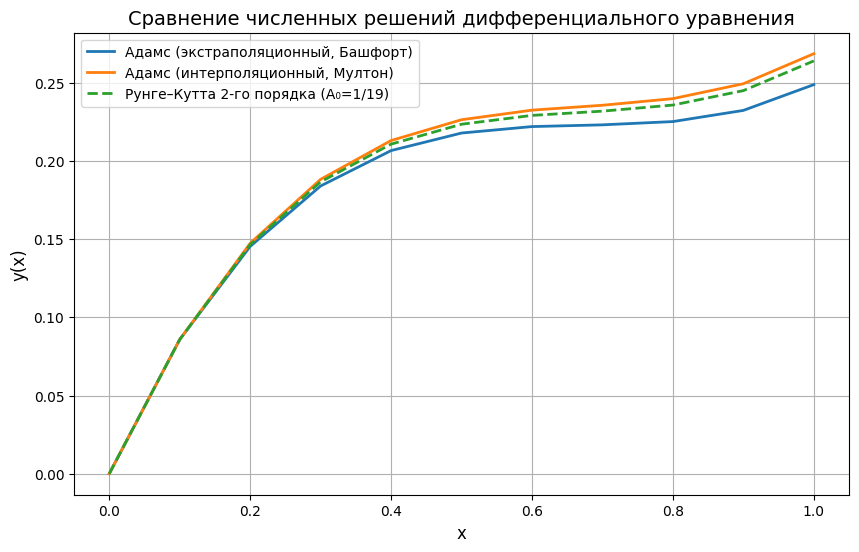

,x,Runge_Kutta_2,Adams_Extrapolation,Adams_Interpolation
0,0.0,0.000000,0.000000,0.000000
1,0.1,0.085793,0.085793,0.085793
2,0.2,0.146532,0.145344,0.147366
3,0.3,0.186625,0.183993,0.188243
4,0.4,0.210753,0.206621,0.213054
5,0.5,0.223475,0.217846,0.226353
6,0.6,0.229122,0.221974,0.232481
7,0.7,0.231844,0.223085,0.235607
8,0.8,0.235733,0.225174,0.239837
9,0.9,0.244967,0.232313,0.249353


In [115]:
import numpy as np
import pandas as pd
import sympy as sp
from scipy.integrate import solve_ivp

def f(x, y):
    return 1 - np.sin(2*x + y) + 0.3*y/(x + 2)

# Параметры
a = 0
b = 1
h = 0.1

x = np.arange(a, b + h, h)
N = len(x)
y = np.zeros(N)

y_rk2 = np.zeros(N)
y_rk2[0] = 0

A0 = 1/19
A1 = 1 - A0
alpha = 1/2 * 1/A1
beta  = 1/2 * 1/A1 

for n in range(N - 1):
    phi_0 = f(x[n], y_rk2[n])
    phi_1 = f(x[n] + alpha*h, y_rk2[n] + beta*h*phi_0)

    y_rk2[n+1] = y_rk2[n] + h * (A0 * phi_0 + A1 * phi_1)


y_extr = np.zeros(N)   # экстраполяционный
y_intr = np.zeros(N)   # интерполяционный

# начальные условия
y_extr[0:2] = y_rk2[0:2]
y_intr[0:2] = y_rk2[0:2]

# Основной цикл
for i in range(1, N - 1):
    # Экстраполяция
    y_pred = y_extr[i] + h/2 * (3*f(x[i], y_extr[i]) - f(x[i-1], y_extr[i-1]))
    y_extr[i+1] = y_pred

    # Интерполяция
    f_pred = f(x[i+1], y_pred)
    y_corr = y_intr[i] + h/2 * (f_pred + f(x[i], y_intr[i]))
    y_intr[i+1] = y_corr

# --- Таблица результатов ---
df = pd.DataFrame({
    "x": x,
    "Runge_Kutta_2": y_rk2,
    "Adams_Extrapolation": y_extr,
    "Adams_Interpolation": y_intr
})

# --- Визуализация ---
plt.figure(figsize=(10, 6))
plt.plot(x, y_extr, label="Адамс (экстраполяционный, Башфорт)", linewidth=2)
plt.plot(x, y_intr, label="Адамс (интерполяционный, Мултон)", linewidth=2)
plt.plot(x, y_rk2, '--', label="Рунге–Кутта 2-го порядка (A₀=1/19)", linewidth=2)
plt.xlabel("x", fontsize=12)
plt.ylabel("y(x)", fontsize=12)
plt.title("Сравнение численных решений дифференциального уравнения", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()

df.head(30)